# <font color= darkred>Applied Machine Learning (Project 1) - Group 04</font>

### Shraddha Hemant Kadam (sxk190069)
### Yash Rajkumar Keshan (yrk190000)


# Classification Task:<font color=darkred> US Police Shootings- Racism in America</font>
## Use Case: To predict whether US police shootings are resulting towards racism.




# Read, Understand and Preprocess Data:


In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import pylab as plt
import random
import matplotlib.pyplot as mt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline 


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [2]:
df = pd.read_csv('shootings.csv') #reading data from csv
df.info() #print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [3]:
df.head() #first 5 rows of the dataset

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Inserting Missing Values:

In [4]:
#inserting missing values since the original data is complete with no NaN values.
def dropout(a, percent):
    # create a copy
    mat = a.copy()
    # number of values to replace
    prop = int(mat.size * percent)
    # indices to mask
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

df1=df.to_numpy()
modified = dropout(df1, 0.1)
df = pd.DataFrame(data=modified, columns=["id", "name","date","manner_of_death","armed","age","gender","race","city","state","signs_of_mental_illness","threat_level","flee","body_camera","arms_category"])


In [5]:
df.columns[df.isnull().any()] #checking if the Nan values are successfully inserted


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

# Handeling Missing Values:


In [6]:
#number of missing values in each column 
df.isnull().sum()

id                         467
name                       519
date                       471
manner_of_death            501
armed                      511
age                        449
gender                     500
race                       501
city                       514
state                      481
signs_of_mental_illness    491
threat_level               492
flee                       483
body_camera                483
arms_category              479
dtype: int64

In [7]:
df.shape #shape of the dataframe

(4895, 15)

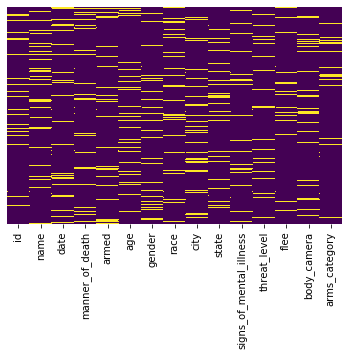

In [8]:
#looking for NaN values in all columns using heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

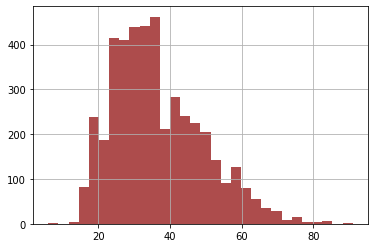

In [9]:
#handeling missing values of Age column 
df['age'].dropna().hist(bins=30, color='darkred',alpha=0.7)

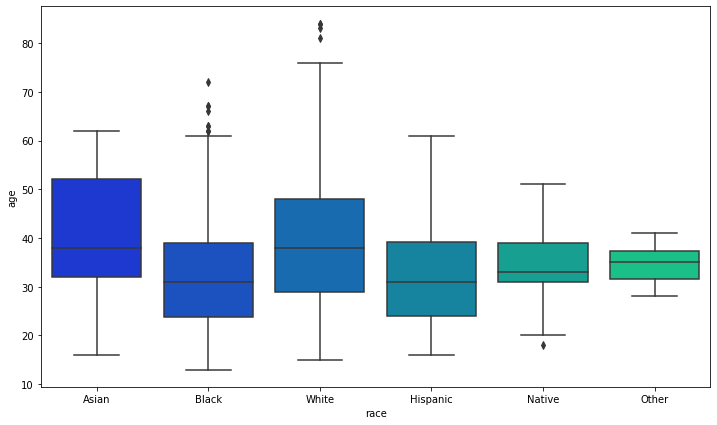

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='race',y='age',data=df.dropna(),palette='winter') #comparing age and race columns to get insights 

In [11]:
#from the above insights writing a function to replace NaN values depending on race
def impute_age(cols):
    age = cols[0]
    race= cols[1]
    
    if pd.isnull(age):

        if race == 'Hispanic':
            return 34

        elif race == 'White':
            return 39
        
        elif race == 'Black':
            return 30
        
        elif race == 'Asian':
            return 44
        
        elif race == 'Native':
            return 28
       
        else:
            return 29

    else:
        return age

In [12]:
df['age'] = df[['age','race']].apply(impute_age,axis=1) #Calling function and replacing Nan values 

In [13]:
#handeling missing values of date column 
#since it has string values, we will consider mode 
df['date'].mode(dropna=True)

0    2018-01-06
1    2018-06-29
dtype: object

In [14]:
df['date'].replace(np.NaN, '2018-06-29',inplace = True)

In [15]:
#dropping unwanted columns
df.drop('id',axis=1,inplace=True)
df.drop('name',axis=1,inplace=True)
df.drop('city',axis=1,inplace=True)
df.drop('armed',axis=1,inplace=True)


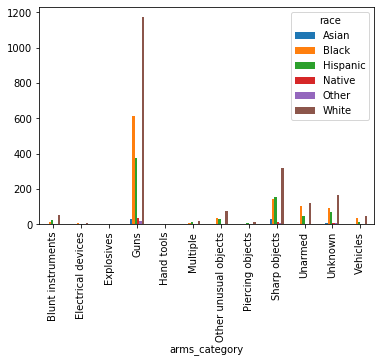

In [16]:
#handeling missing values of arms_category
pd.crosstab(df['arms_category'].dropna(), df['race'].dropna()).plot(kind = 'bar') #comparing arms_category with race to get insights

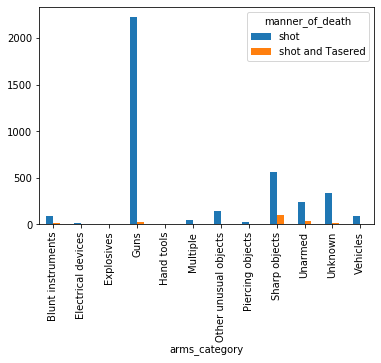

In [17]:
#comparing arms_category with manner_of_death to get insights
pd.crosstab(df['arms_category'].dropna(), df['manner_of_death'].dropna()).plot(kind = 'bar')

In [18]:
#writing a function depending on above insights
def impute_arms_category(cols): 
    arms_category = cols[0]
    manner_of_death= cols[1]
    
    if pd.isnull(arms_category):

        if manner_of_death == 'shot and Tasered':
            return 'Sharp objects'
       
        else:
            return 'Guns'

    else:
        return arms_category

In [19]:
#calling function and replacing NaN values in arms_category
df['arms_category'] = df[['arms_category','manner_of_death']].apply(impute_arms_category,axis=1)


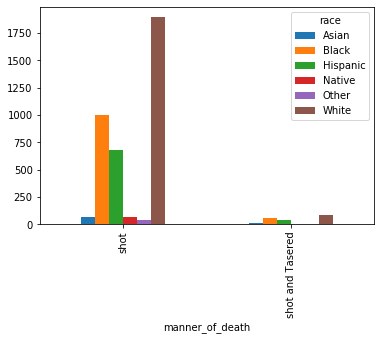

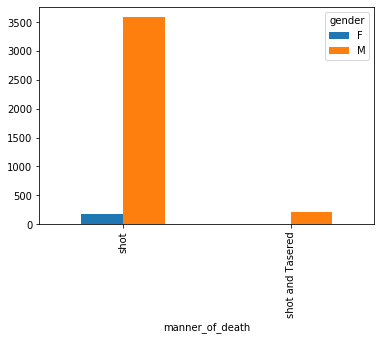

In [20]:
#handeling missing values of manner_of_death
pd.crosstab(df['manner_of_death'].dropna(), df['race'].dropna()).plot(kind = 'bar')
#looking into gender
pd.crosstab(df['manner_of_death'].dropna(), df['gender'].dropna()).plot(kind = 'bar')


In [21]:
#checkin mode of manner_of_death
df['manner_of_death'].mode(dropna=True)

0    shot
dtype: object

In [22]:
#replacing with shot
df['manner_of_death'].replace(np.NaN, 'shot',inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
date                       4895 non-null object
manner_of_death            4895 non-null object
age                        4895 non-null float64
gender                     4395 non-null object
race                       4394 non-null object
state                      4414 non-null object
signs_of_mental_illness    4404 non-null object
threat_level               4403 non-null object
flee                       4412 non-null object
body_camera                4412 non-null object
arms_category              4895 non-null object
dtypes: float64(1), object(10)
memory usage: 420.7+ KB


0    M
dtype: object

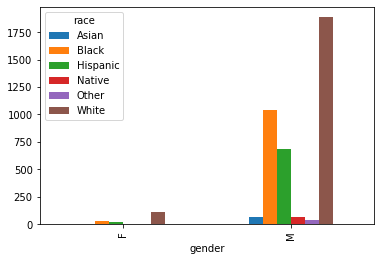

In [24]:
#checking for gender
pd.crosstab(df['gender'].dropna(), df['race'].dropna()).plot(kind = 'bar')
#checking its mode
df['gender'].mode(dropna=True)

In [25]:
#replacing with Male
df['gender'].replace(np.NaN, 'M',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
date                       4895 non-null object
manner_of_death            4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4394 non-null object
state                      4414 non-null object
signs_of_mental_illness    4404 non-null object
threat_level               4403 non-null object
flee                       4412 non-null object
body_camera                4412 non-null object
arms_category              4895 non-null object
dtypes: float64(1), object(10)
memory usage: 420.7+ KB


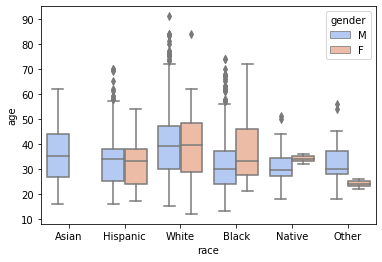

In [27]:
#handeling missing values in race column 
sns.boxplot(x="race",y="age",hue="gender",data=df.dropna(), palette="coolwarm")

In [28]:
#writing a function based on above insights to replace NaN values
def impute_race(cols):
    race = cols[0]
    age= cols[1]
    gender= cols[2]
    
    if pd.isnull(race):
        if age<= 28.0 and gender=='M':
            return 'Native'
        elif age<= 29.0 and gender =='M':
            return 'Other'
        elif age<=30.0 and gender=='M' or gender== 'F':
            return 'Black'
        elif age<=32.0 and gender=='F':
            return 'Hispanic'
        elif age<=34.0 and gender=='M':
            return 'Hispanic'
        elif age<=36.0 and gender=='F':
            return 'Other'
        elif age<=37.0 and gender=='M':
            return 'Asian'
        elif age <=39.0 and gender=='M' or gender=='F':
            return 'White'
        elif age<=42.0 and gender=='F':
            return 'Asian'
        else:
            return 'White'
    
    else:
        return race

In [29]:
df['race'] = df[['race','age','gender']].apply(impute_race,axis=1) #calling function to replace NaN values in race


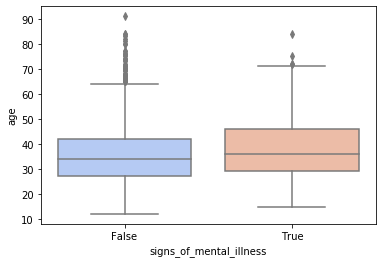

In [30]:
#handeling missing values of signs_of_mental_illness
sns.boxplot(x="signs_of_mental_illness",y="age",data=df.dropna(), palette="coolwarm")

In [31]:
#writing function based on above insights to replace NaN values fron signs_of_mental_illness
def impute_signs_of_mental_illness(cols):
    signs_of_mental_illness = cols[0]
    age= cols[1]
    
    if pd.isnull(signs_of_mental_illness):
        if age<=34.0:
            return 'False'
        else:
            return 'True'
    
    else:
        return signs_of_mental_illness

In [32]:
df['signs_of_mental_illness'] = df[['signs_of_mental_illness','age']].apply(impute_signs_of_mental_illness,axis=1)
#calling function to replace NaN values

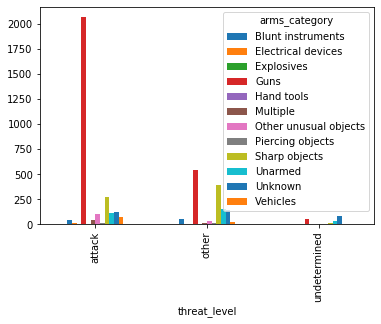

In [33]:
#handeling missing values of threat_level column
pd.crosstab(df['threat_level'].dropna(), df['arms_category'].dropna()).plot(kind = 'bar')


In [34]:
#writing function on above insights to replace NaN values in threat_level
def impute_threat_level(cols):
    threat_level = cols[0]
    arms_category= cols[1]
    
    if pd.isnull(threat_level):
        if arms_category=='Unknown' or arms_category=='Unarmed' or arms_category=='Sharp objects':
            return 'other'
        else:
            return 'attack'
    
    else:
        return threat_level

In [35]:
df['threat_level'] = df[['threat_level','arms_category']].apply(impute_threat_level,axis=1)
#calling function to replace NaN values 


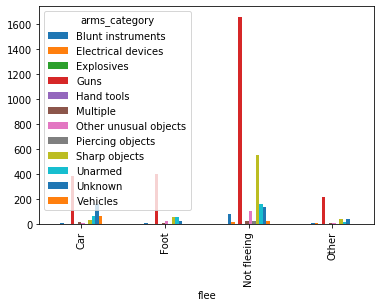

In [36]:
#handeling missing values of flrr column
pd.crosstab(df['flee'].dropna(), df['arms_category'].dropna()).plot(kind = 'bar')


In [37]:
#writing function to replace NaN values in flee
def impute_flee(cols):
    flee = cols[0]
    arms_category= cols[1]
    
    if pd.isnull(flee):
        if arms_category=='Vehicles' or arms_category=='Unknown':
            return 'Car'
        else:
            return 'Not fleeing'
    
    else:
        return flee

In [38]:
df['flee'] = df[['flee','arms_category']].apply(impute_flee,axis=1) #calling function to replace NaN values


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
date                       4895 non-null object
manner_of_death            4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
state                      4414 non-null object
signs_of_mental_illness    4895 non-null object
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4412 non-null object
arms_category              4895 non-null object
dtypes: float64(1), object(10)
memory usage: 420.7+ KB


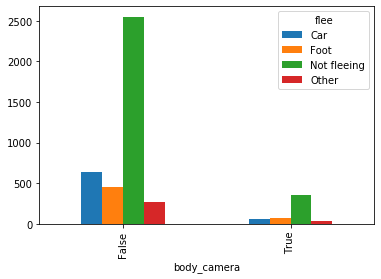

In [40]:
#handeling missing values of body_camera column
pd.crosstab(df['body_camera'].dropna(), df['flee'].dropna()).plot(kind = 'bar')


In [41]:
df['body_camera'].replace(np.NaN, 'False',inplace = True) #replacing NaN values with false
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
date                       4895 non-null object
manner_of_death            4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
state                      4414 non-null object
signs_of_mental_illness    4895 non-null object
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null object
arms_category              4895 non-null object
dtypes: float64(1), object(10)
memory usage: 420.7+ KB


In [42]:
df.state.mode(dropna=True) #checking mode of state column after dropping NaN values

0    CA
dtype: object

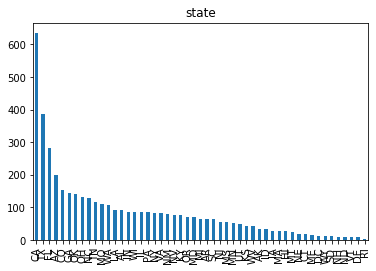

In [43]:
df['state'].value_counts().plot(kind='bar', title='state')  #plotting state column as histogram 

In [44]:
df['state'].replace(np.NaN, 'CA',inplace = True) #replacing NaN values with CA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 11 columns):
date                       4895 non-null object
manner_of_death            4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null object
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null object
arms_category              4895 non-null object
dtypes: float64(1), object(10)
memory usage: 420.7+ KB


# Preparing Data for ML Modeling:

In [46]:
#converting date from object to datetime datatype 
df['date'] = pd.to_datetime(df.date)
df.head()

,date,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,2015-01-02,shot,53.0,M,Asian,WA,True,attack,Not fleeing,False,Guns
1,2015-01-02,shot,47.0,M,White,OR,False,attack,Not fleeing,False,Guns
2,2015-01-03,shot and Tasered,23.0,M,Hispanic,KS,False,other,Not fleeing,False,Unarmed
3,2015-01-04,shot,32.0,M,White,CA,True,attack,Not fleeing,False,Other unusual objects
4,2015-01-04,shot,39.0,M,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects


In [47]:
#seperating date column as year, month and day 
df['Year']=df.date.dt.year
df['Month']=df.date.dt.month
df['Day']=df.date.dt.day
df.head()

,date,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,2015-01-02,shot,53.0,M,Asian,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,2015-01-02,shot,47.0,M,White,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,2015-01-03,shot and Tasered,23.0,M,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,2015-01-04,shot,32.0,M,White,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,2015-01-04,shot,39.0,M,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


In [48]:
#Dropping date as we added year, month and day seperately
df=df.drop(['date'],axis=1)
df.head()

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,shot,53.0,M,Asian,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,47.0,M,White,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,23.0,M,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,32.0,M,White,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,39.0,M,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


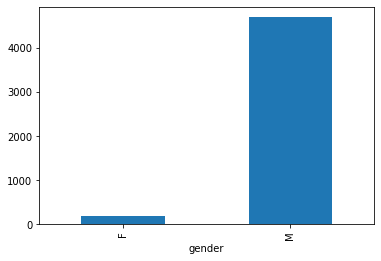

In [49]:
df.groupby('gender').count()['race'].plot(kind = 'bar') #checking which gender has max count 

In [50]:
#changing gender from categorical to map values Male as 1 and Female as 0 based on t he results from above graph
df['gender'] = df['gender'].map({'M':1, 'F':0}).astype(int)
df.head()

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,shot,53.0,1,Asian,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,47.0,1,White,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,23.0,1,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,32.0,1,White,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,39.0,1,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


In [51]:
#changing age datatype from float to int
df['age']=df.age.astype(int)
df.head()

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,shot,53,1,Asian,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,47,1,White,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,23,1,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,32,1,White,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,39,1,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


In [52]:
df.signs_of_mental_illness.replace({'True': True, 'False': False}, inplace=True) #Replacing object values of signs_of_mental_illness to boolean values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 13 columns):
manner_of_death            4895 non-null object
age                        4895 non-null int32
gender                     4895 non-null int32
race                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null object
arms_category              4895 non-null object
Year                       4895 non-null int64
Month                      4895 non-null int64
Day                        4895 non-null int64
dtypes: bool(1), int32(2), int64(3), object(7)
memory usage: 425.5+ KB


In [53]:
df.head()

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,shot,53,1,Asian,WA,True,attack,Not fleeing,False,Guns,2015,1,2
1,shot,47,1,White,OR,False,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,23,1,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,32,1,White,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,39,1,Hispanic,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4


In [54]:
#changing signs_of_mental_illness variable from boolean to int 
df['signs_of_mental_illness'] = df['signs_of_mental_illness'].astype(int) 
df.head()

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Year,Month,Day
0,shot,53,1,Asian,WA,1,attack,Not fleeing,False,Guns,2015,1,2
1,shot,47,1,White,OR,0,attack,Not fleeing,False,Guns,2015,1,2
2,shot and Tasered,23,1,Hispanic,KS,0,other,Not fleeing,False,Unarmed,2015,1,3
3,shot,32,1,White,CA,1,attack,Not fleeing,False,Other unusual objects,2015,1,4
4,shot,39,1,Hispanic,CO,0,attack,Not fleeing,False,Piercing objects,2015,1,4


In [55]:
df.body_camera.replace({'True': True, 'False': False}, inplace=True) #Replacing object values of body_camera to boolean values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 13 columns):
manner_of_death            4895 non-null object
age                        4895 non-null int32
gender                     4895 non-null int32
race                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null int32
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
Year                       4895 non-null int64
Month                      4895 non-null int64
Day                        4895 non-null int64
dtypes: bool(1), int32(3), int64(3), object(6)
memory usage: 406.4+ KB


In [56]:
#changing body_camera variable from boolean to int 
df['body_camera'] = df['body_camera'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 13 columns):
manner_of_death            4895 non-null object
age                        4895 non-null int32
gender                     4895 non-null int32
race                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null int32
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null int32
arms_category              4895 non-null object
Year                       4895 non-null int64
Month                      4895 non-null int64
Day                        4895 non-null int64
dtypes: int32(4), int64(3), object(6)
memory usage: 420.7+ KB


In [57]:
# Replace column manner_of_death with one hot vector 
cols = pd.get_dummies(df['manner_of_death'], prefix= 'manner_of_death')
df[cols.columns] = cols
df.drop('manner_of_death', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
age                                 4895 non-null int32
gender                              4895 non-null int32
race                                4895 non-null object
state                               4895 non-null object
signs_of_mental_illness             4895 non-null int32
threat_level                        4895 non-null object
flee                                4895 non-null object
body_camera                         4895 non-null int32
arms_category                       4895 non-null object
Year                                4895 non-null int64
Month                               4895 non-null int64
Day                                 4895 non-null int64
manner_of_death_shot                4895 non-null uint8
manner_of_death_shot and Tasered    4895 non-null uint8
dtypes: int32(4), int64(3), object(5), uint8(2)
memory usage: 392.1+ KB


In [58]:
df.race.unique() #checking unique values in race column 

array(['Asian', 'White', 'Hispanic', 'Black', 'Native', 'Other'],
      dtype=object)

In [59]:
# Replace column race with one hot vector 
df['race'] = df['race'].map({'White':0, 'Black':1, 'Hispanic':0, 'Asian':0, 'Native':0, 'Other':0}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
age                                 4895 non-null int32
gender                              4895 non-null int32
race                                4895 non-null int32
state                               4895 non-null object
signs_of_mental_illness             4895 non-null int32
threat_level                        4895 non-null object
flee                                4895 non-null object
body_camera                         4895 non-null int32
arms_category                       4895 non-null object
Year                                4895 non-null int64
Month                               4895 non-null int64
Day                                 4895 non-null int64
manner_of_death_shot                4895 non-null uint8
manner_of_death_shot and Tasered    4895 non-null uint8
dtypes: int32(5), int64(3), object(4), uint8(2)
memory usage: 372.9+ KB


In [60]:
# Replace column threat_level with one hot vector 
cols = pd.get_dummies(df['threat_level'], prefix= 'threat_level')
df[cols.columns] = cols
df.drop('threat_level', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 16 columns):
age                                 4895 non-null int32
gender                              4895 non-null int32
race                                4895 non-null int32
state                               4895 non-null object
signs_of_mental_illness             4895 non-null int32
flee                                4895 non-null object
body_camera                         4895 non-null int32
arms_category                       4895 non-null object
Year                                4895 non-null int64
Month                               4895 non-null int64
Day                                 4895 non-null int64
manner_of_death_shot                4895 non-null uint8
manner_of_death_shot and Tasered    4895 non-null uint8
threat_level_attack                 4895 non-null uint8
threat_level_other                  4895 non-null uint8
threat_level_undetermined           4895 non-null 

In [61]:
# Replace column flee with one hot vector 
cols = pd.get_dummies(df['flee'], prefix= 'flee')
df[cols.columns] = cols
df.drop('flee', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 19 columns):
age                                 4895 non-null int32
gender                              4895 non-null int32
race                                4895 non-null int32
state                               4895 non-null object
signs_of_mental_illness             4895 non-null int32
body_camera                         4895 non-null int32
arms_category                       4895 non-null object
Year                                4895 non-null int64
Month                               4895 non-null int64
Day                                 4895 non-null int64
manner_of_death_shot                4895 non-null uint8
manner_of_death_shot and Tasered    4895 non-null uint8
threat_level_attack                 4895 non-null uint8
threat_level_other                  4895 non-null uint8
threat_level_undetermined           4895 non-null uint8
flee_Car                            4895 non-null u

In [62]:
# Replace column arms_category with one hot vector 
cols = pd.get_dummies(df['arms_category'], prefix= 'arms_category')
df[cols.columns] = cols
df.drop('arms_category', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 30 columns):
age                                    4895 non-null int32
gender                                 4895 non-null int32
race                                   4895 non-null int32
state                                  4895 non-null object
signs_of_mental_illness                4895 non-null int32
body_camera                            4895 non-null int32
Year                                   4895 non-null int64
Month                                  4895 non-null int64
Day                                    4895 non-null int64
manner_of_death_shot                   4895 non-null uint8
manner_of_death_shot and Tasered       4895 non-null uint8
threat_level_attack                    4895 non-null uint8
threat_level_other                     4895 non-null uint8
threat_level_undetermined              4895 non-null uint8
flee_Car                               4895 non-null uint8
flee_Fo

In [63]:
# Replace column state with one hot vector 
cols = pd.get_dummies(df['state'], prefix= 'state')
df[cols.columns] = cols
df.drop('state', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 80 columns):
age                                    4895 non-null int32
gender                                 4895 non-null int32
race                                   4895 non-null int32
signs_of_mental_illness                4895 non-null int32
body_camera                            4895 non-null int32
Year                                   4895 non-null int64
Month                                  4895 non-null int64
Day                                    4895 non-null int64
manner_of_death_shot                   4895 non-null uint8
manner_of_death_shot and Tasered       4895 non-null uint8
threat_level_attack                    4895 non-null uint8
threat_level_other                     4895 non-null uint8
threat_level_undetermined              4895 non-null uint8
flee_Car                               4895 non-null uint8
flee_Foot                              4895 non-null uint8
flee_Not

In [64]:
df.shape #shape of dataframe after preprocessing data

(4895, 80)

In [65]:
X = df.drop('race', axis = 1)
y = df['race']

In [66]:
#MinMax scaling typically has advantages over standard scaling as the distribution of the feature (or any transformations of the feature) isn’t Gaussian, hence implementing it here 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [68]:

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


# 1. KNN Classification:

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [70]:
#Using GridSearchCV (Grid Search and Cross Validation) to find best tuned parameter 
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 25)}
score = 'accuracy'

print(__doc__)

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='%s' % score, cv=5, n_jobs=-1) #GridSearchCV for hyperparameter tuning - In this case finding the best n_neighbors
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_) #Prints the best paramater selected that gives more cross validated accuracy
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")

knn_train_pred = clf.predict(X_train)
print('The training score after tuning is {0}\n'.format(round(accuracy_score(y_train, knn_train_pred),3)))

print("The scores are then computed on the full evaluation set.")
print()

y_true, knn_pred = y_test, clf.predict(X_test) 
print(classification_report(y_true, knn_pred))
print()


#Storing the metrics 'KNN_tuned_accuracy', 'KNN_tuned_precision' and 'KNN_tuned_recall' obtained by using tuned paramater from GridSearchCV on KNN model for future use to compare between models

KNN_tuned_accuracy = round(accuracy_score(y_test, knn_pred),3)
print('Accuracy obtained using KNN model with best tuned parameter from GridSearchCV: {0}'.format(KNN_tuned_accuracy))

KNN_tuned_precision =  round(precision_score(y_test, knn_pred),3)
print('Precision obtained using KNN model with best tuned parameter from GridSearchCV: {0}'.format(KNN_tuned_precision))

KNN_tuned_recall =  round(recall_score(y_test, knn_pred),3)
print('Recall obtained using KNN model with best tuned parameter from GridSearchCV: {0}'.format(KNN_tuned_recall))

KNN_tuned_f1score =  round(f1_score(y_test, knn_pred),3)
print('f1 score obtained using KNN model with best tuned parameter from GridSearchCV: {0}'.format(KNN_tuned_f1score))
    

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'n_neighbors': 24}

Grid scores on development set:

0.678 (+/-0.020) for {'n_neighbors': 1}
0.743 (+/-0.008) for {'n_neighbors': 2}
0.723 (+/-0.025) for {'n_neighbors': 3}
0.741 (+/-0.008) for {'n_neighbors': 4}
0.726 (+/-0.019) for {'n_neighbors': 5}
0.747 (+/-0.011) for {'n_neighbors': 6}
0.735 (+/-0.012) for {'n_neighbors': 7}
0.750 (+/-0.005) for {'n_neighbors': 8}
0.738 (+/-0.018) for {'n_neighbors': 9}
0.748 (+/-0.015) for {'n_neighbors': 10}
0.739 (+/-0.022) for {'n_neighbors': 11}
0.752 (+/-0.006) for {'n_neighbors': 12}
0.745 (+/-0.014) for {'n_neighbors': 13}
0.753 (+/-0.014) for {'n_neighbors': 14}
0.751 (+/-0.016) for {'n_neighbors': 15}
0.755 (+/-0.014) for {'n_neighbors': 16}
0.752 (+/-0.016) for {'n_neighbors': 17}
0.754 (+/-0.009) for {'n_neighbors': 18}
0.751 (+/-0.011) for {'n_neighbors': 19}
0.755 (+/-0.006) for {'n

# 2. Logistic Regression:

In [71]:
#Using GridSearchCV (Grid Search and Cross Validation) to find best tuned parameter
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

score='accuracy'

print(__doc__)
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")

logistic_train_pred = clf.predict(X_train)
print('The training score after tuning is {0}\n'.format(round(accuracy_score(y_train, logistic_train_pred),3)))

print("The scores are computed on the full evaluation set.")
print()
y_true, logistic_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, logistic_pred))
print()

#Storing the metrics 'Logistic_tuned_accuracy', 'Logistic_tuned_precision' and 'Logitic_tuned_recall' for future use to compare between models

Logistic_tuned_accuracy = round(accuracy_score(y_test, logistic_pred),3)
print('Accuracy obtained using Logistic Regression model with best tuned parameter from GridSearchCV: {0}'.format(Logistic_tuned_accuracy))

Logistic_tuned_precision =  round(precision_score(y_test, logistic_pred),3)
print('Precision obtained using Logistic Regression model with best tuned parameter from GridSearchCV: {0}'.format(Logistic_tuned_precision))

Logistic_tuned_recall =  round(recall_score(y_test, logistic_pred),3)
print('Recall obtained using Logistic Regression model with best tuned parameter from GridSearchCV: {0}'.format(Logistic_tuned_recall))

Logistic_tuned_f1score =  round(f1_score(y_test, logistic_pred),3)
print('f1 score obtained using Logistic model with best tuned parameter from GridSearchCV: {0}'.format(Logistic_tuned_f1score))
    




Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 2.7825594022071245, 'penalty': 'l2'}

Grid scores on development set:

0.771 (+/-0.018) for {'C': 1.0, 'penalty': 'l1'}
0.770 (+/-0.010) for {'C': 1.0, 'penalty': 'l2'}
0.771 (+/-0.015) for {'C': 2.7825594022071245, 'penalty': 'l1'}
0.772 (+/-0.015) for {'C': 2.7825594022071245, 'penalty': 'l2'}
0.772 (+/-0.015) for {'C': 7.742636826811269, 'penalty': 'l1'}
0.771 (+/-0.016) for {'C': 7.742636826811269, 'penalty': 'l2'}
0.772 (+/-0.014) for {'C': 21.544346900318832, 'penalty': 'l1'}
0.772 (+/-0.014) for {'C': 21.544346900318832, 'penalty': 'l2'}
0.772 (+/-0.014) for {'C': 59.94842503189409, 'penalty': 'l1'}
0.772 (+/-0.014) for {'C': 59.94842503189409, 'penalty': 'l2'}
0.772 (+/-0.015) for {'C': 166.81005372000593, 'penalty': 'l1'}
0.772 (+/-0.015) for {'C': 166.81005372000593, 'penalty': 'l2'}
0.772 (+/-0.015) for {'C': 464.158883

The prediction on test data is [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 

# 3. Support Vector Machine

### 3.1 Linear Support Vector Machine:

In [72]:
#Using GridSearchCV (GridSearch and Cross Validation) to find best tuned parameter
from sklearn.svm import LinearSVC,SVC
linearsvc = LinearSVC()

param_grid = {'C':np.arange(0.01,1000,10),'random_state':[0]} #C - Regularization Parameter

score='accuracy'

print(__doc__)
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(linearsvc,param_grid,cv=5,scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('C = {0}'.format(clf.best_params_['C']))
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")

linearsvc_train_pred = clf.predict(X_train)
print('The training score after tuning is {0}\n'.format(round(accuracy_score(y_train, linearsvc_train_pred),3)))

print("The scores are computed on the full evaluation set.")
print()
y_true, linearsvc_pred = y_test, clf.predict(X_test)
print(classification_report(y_true,linearsvc_pred))
print()

#Storing the metrics 'LinearSVC_tuned_accuracy', 'LinearSVC_tuned_precision' and 'LinearSVC_tuned_recall' obtained by using tuned paramater from GridSearchCV on LinearSVC model for future use to compare between models

LinearSVC_tuned_accuracy = round(accuracy_score(y_test, linearsvc_pred),3)
print('Accuracy obtained using LinearSVC model with best tuned parameter from GridSearchCV: {0}'.format(LinearSVC_tuned_accuracy))

LinearSVC_tuned_precision =  round(precision_score(y_test, linearsvc_pred),3)
print('Precision obtained using LinearSVC model with best tuned parameter from GridSearchCV: {0}'.format(LinearSVC_tuned_precision))

LinearSVC_tuned_recall =  round(recall_score(y_test, linearsvc_pred),3)
print('Recall obtained using LinearSVC model with best tuned parameter from GridSearchCV: {0}'.format(LinearSVC_tuned_recall))

LinearSVC_tuned_f1score =  round(f1_score(y_test, linearsvc_pred),3)
print('f1 score obtained using LinearSVC model with best tuned parameter from GridSearchCV: {0}'.format(LinearSVC_tuned_f1score))
    



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

C = 20.01

Grid scores on development set:

0.764 (+/-0.008) for {'C': 0.01, 'random_state': 0}
0.770 (+/-0.012) for {'C': 10.01, 'random_state': 0}
0.772 (+/-0.008) for {'C': 20.01, 'random_state': 0}
0.768 (+/-0.012) for {'C': 30.01, 'random_state': 0}
0.763 (+/-0.013) for {'C': 40.01, 'random_state': 0}
0.747 (+/-0.098) for {'C': 50.01, 'random_state': 0}
0.760 (+/-0.047) for {'C': 60.01, 'random_state': 0}
0.762 (+/-0.028) for {'C': 70.01, 'random_state': 0}
0.674 (+/-0.144) for {'C': 80.01, 'random_state': 0}
0.690 (+/-0.184) for {'C': 90.01, 'random_state': 0}
0.756 (+/-0.022) for {'C': 100.01, 'random_state': 0}
0.759 (+/-0.020) for {'C': 110.01, 'random_state': 0}
0.709 (+/-0.191) for {'C': 120.01, 'random_state': 0}
0.746 (+/-0.035) for {'C': 130.01, 'random_state': 0}
0.664 (+/-0.258) for {'C': 140.01, 'random_state': 0}
0.727

### 3.2 Kernelized Support Vector Machine:

In [73]:
#Using GridSearchCV to find best tuned parameter kernelizedsvc = SVC()

#Hyper Parameters Set
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf','poly']}]

score='accuracy'

print(__doc__)
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(kernelizedsvc,param_grid,cv=5,scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")

kernelizedsvc_train_pred = clf.predict(X_train)
print('The training score after tuning is {0}\n'.format(round(accuracy_score(y_train, kernelizedsvc_train_pred),3)))

print("The scores are computed on the full evaluation set.")
print()
y_true, kernelizedsvc_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, kernelizedsvc_pred))
print()

#Storing the metrics 'KernelizedSVC_tuned_accuracy', 'KernelizedSVC_tuned_precision' and 'KernelizedSVC_tuned_recall' obtained by using tuned paramater from GridSearchCV on KernelizedSVC model for future use to compare between models

KernelizedSVC_tuned_accuracy = round(accuracy_score(y_test, kernelizedsvc_pred),3)
print('Accuracy obtained using KernelizedSVC model with best tuned parameter from GridSearchCV: {0}'.format(KernelizedSVC_tuned_accuracy))

KernelizedSVC_tuned_precision =  round(precision_score(y_test, kernelizedsvc_pred),3)
print('Precision obtained using KernelizedSVC model with best tuned parameter from GridSearchCV: {0}'.format(KernelizedSVC_tuned_precision))

KernelizedSVC_tuned_recall =  round(recall_score(y_test, kernelizedsvc_pred),3)
print('Recall obtained using KernelizedSVC model with best tuned parameter from GridSearchCV: {0}'.format(KernelizedSVC_tuned_recall))

KernelizedSVC_tuned_f1score =  round(f1_score(y_test, kernelizedsvc_pred),3)
print('f1 score obtained using KernelizedSVC model with best tuned parameter from GridSearchCV: {0}'.format(KernelizedSVC_tuned_f1score))
    

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.765 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.765 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.765 (+/-0.011) for {'C': 100, 'kernel': 'linear'}
0.765 (+/-0.011) for {'C': 1000, 'kernel': 'linear'}
0.758 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.758 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.758 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.758 (+/-0.001) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.001) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.758 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.758 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.761 (+/-0.006) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'

# 4. Decision Tree Classifier:

In [74]:
#Using GridSearchCV to find best tuned parameter
from sklearn.tree import DecisionTreeClassifier

classificationtree = DecisionTreeClassifier()

#Hyper Parameters Set
param_grid = {'criterion': ['gini','entropy'], 'min_samples_split' : range(10,300,10), 'max_depth': range(1,20), 'max_features': ['auto', 'sqrt', 'log2'],'random_state':[0]}

score='accuracy'

print(__doc__)
print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(classificationtree,param_grid,cv=5,scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, classificationtree_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, classificationtree_pred))
print()

#Storing the metrics 'ClassificationTree_tuned_accuracy', 'ClassificationTree_tuned_precision' and 'ClassificationTree_tuned_recall' obtained by using tuned paramater from GridSearchCV on DecisionTreeClassifier model for future use to compare between models

ClassificationTree_tuned_accuracy = round(accuracy_score(y_test, classificationtree_pred),3)
print('Accuracy obtained using DecisionTreeClassifier model with best tuned parameter from GridSearchCV: {0}'.format(ClassificationTree_tuned_accuracy))

ClassificationTree_tuned_precision =  round(precision_score(y_test, classificationtree_pred),3)
print('Precision obtained using DecisionTreeClassifier model with best tuned parameter from GridSearchCV: {0}'.format(ClassificationTree_tuned_precision))

ClassificationTree_tuned_recall =  round(recall_score(y_test, classificationtree_pred),3)
print('Recall obtained using DecisionTreeClassifier model with best tuned parameter from GridSearchCV: {0}'.format(ClassificationTree_tuned_recall))

ClassificationTree_tuned_f1score =  round(f1_score(y_test, classificationtree_pred),3)
print('f1 score obtained using DecisionTreeClassifier model with best tuned parameter from GridSearchCV: {0}'.format(ClassificationTree_tuned_f1score))
    



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2', 'min_samples_split': 100, 'random_state': 0}

Grid scores on development set:

0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 10, 'random_state': 0}
0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 20, 'random_state': 0}
0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 30, 'random_state': 0}
0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 40, 'random_state': 0}
0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 50, 'random_state': 0}
0.758 (+/-0.001) for {'criterion': 'gini', 'max_depth': 1, 'max_feature

0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 150, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 160, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 170, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 180, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 190, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 200, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 210, 'random_state': 0}
0.758 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt

In [75]:
#Comparing Performance of ML Models
models = pd.DataFrame({
                'Models': ['KNN Classification','Logistic Regression','Linear SVC','Kernelized SVC','Decision Tree'],
                'Test Accuracy':[KNN_tuned_accuracy,Logistic_tuned_accuracy,LinearSVC_tuned_accuracy,KernelizedSVC_tuned_accuracy,ClassificationTree_tuned_accuracy] ,
                'Precision':[KNN_tuned_precision,Logistic_tuned_precision,LinearSVC_tuned_precision,KernelizedSVC_tuned_precision,ClassificationTree_tuned_precision],
                'Recall': [KNN_tuned_recall,Logistic_tuned_recall,LinearSVC_tuned_recall,KernelizedSVC_tuned_recall,ClassificationTree_tuned_recall] ,
                'f1 Score': [KNN_tuned_f1score,Logistic_tuned_f1score,LinearSVC_tuned_f1score,KernelizedSVC_tuned_f1score,ClassificationTree_tuned_f1score]})

models.sort_values(by='f1 Score',ascending=False)

,Models,Test Accuracy,Precision,Recall,f1 Score
1,Logistic Regression,0.772,0.685,0.238,0.354
2,Linear SVC,0.773,0.707,0.227,0.343
3,Kernelized SVC,0.754,0.636,0.137,0.225
4,Decision Tree,0.744,0.541,0.129,0.208
0,KNN Classification,0.743,0.591,0.051,0.094


If we decide to evaluate on basis of recall, we see Logistic Regression gives us a better recall, hence better model and if we decide to evaluate on basis of f1 score (which is computed involving both precision and recall), we see again Logistic Regression performs better giving a better f1 score. 
Logistic Regression gives us the best f1 score, best recall and relatively better test accuracy and precision.



In [93]:
#Prediction on Test set
logistic_test_pred = clf.predict(X_test)
print('The prediction on test data is {0}\n'.format(logistic_test_pred))


The prediction on test data is [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 